# COVID-19 Numbers and Our Personal Experience: Now and this Fall 2020
by Stan Mohler

Today is Aug.24, 2020.  Let's estimate how many people we each know who have died or recovered from COVID-19.  Then, let's predict roughly how those numbers will change by early November.  We'll use data from [Johns Hopkins University](https://91-divoc.com/pages/covid-visualization).  

DISCLAIMER: This document is mainly an exercise in using Python and Jupyter Notebooks.  The data and calculations are not rigorous.  

In [1]:
population     = 330000000
deaths         =    176000
deaths_per_day =      1000
recoveries     =   2000000

For the numbers above, what are the chances of any one American dying of COVID-19 by now?  

And what are the chances of surviving until now?  

In [2]:
chance_of_dying = deaths/population
chance_of_surviving = 1 - chance_of_dying

print(f'Chance of any American dying to date = {100*chance_of_dying :.3f} %')
print(f'Chance of any American surviving to date = {100*chance_of_surviving :.3f} %')

Chance of any American dying to date = 0.053 %
Chance of any American surviving to date = 99.947 %


About how many people does a typical person know directly?  
These include family, friends, neighbors, co-workers, church members, club members, etc.  
As an approximation, let's assume everyone has the same number of such "friends", given below.    

In [3]:
friends_per_person = 250

We can now estimate what fraction of the American population has yet to lose a friend to COVID-19.  

In [4]:
pop_frac_yet_to_lose_a_friend = chance_of_surviving ** friends_per_person

print(f'Fraction of Americans who have yet to lose a friend = chance of {friends_per_person} people surviving = {100 * pop_frac_yet_to_lose_a_friend :.1f} %')

Fraction of Americans who have yet to lose a friend = chance of 250 people surviving = 87.5 %


Now let's compute the probability of any person having gotten, and recovered from, COVID-19 by now.  

In [5]:
fraction_recovered = recoveries / population
print(f'Fraction of Americans who have recovered from COVID-19 = {100 * fraction_recovered :0.3f}%')

Fraction of Americans who have recovered from COVID-19 = 0.606%


Some people won't know anybody who's gotten COVID-19 and recovered.  Others will know several.  A few will know many.  The distribution is geometric, specifically a negative binomial distribution.  It's the same distribution as the number of ones you might get after 10 rolls of a die.  Let's define a function to calculate and draw it.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb as choose

def calc_plot_neg_binom_dist(friends_per_person, fraction_recovered, description):
    
    N = friends_per_person
    p = fraction_recovered

    #print(f'p = chance of any random person having gotten COVID and recovered = {p :0.5f}')
    #print(' ')
    #print('k    = no. friends who have gotten sick & recoverd')
    #print('P(k) = probability of having that k value')
    #print(' ')
    #print('k  P(k)')
    #print('-  ----')

    maxNumFriendsToConsider = 0
    maxNumFriendsToPlot = 10
    numRecovered = 0
    expectedNumFriends = 0
    probOfKArry = np.zeros(N)
    sumOfProbs = 0

    for k in range(N):
      probOfK = choose(N,k) * p**k * (1-p)**(N-k)
      probOfKArry[k] = probOfK
      expectedNumFriends += probOfK * k
      sumOfProbs += probOfK
      if sumOfProbs <= 0.9999:
        maxNumFriendsToPlot = k
        #print(f'{k}  {probOfK :.3f}')

    expectedNumFriends = expectedNumFriends / sumOfProbs

    # a check on how nicely our histogram ends
    #print(f'\nSum of probabilities = {sumOfProbs :0.6f}   ...should be close to 1.0')

    plt.bar(range(maxNumFriendsToPlot), probOfKArry[0:maxNumFriendsToPlot], color='gray')
    plt.xlabel('no. friends who have gotten sick and recovered')
    plt.ylabel('Probability')
    plt.title('Negative Binomial Distribution')
    plt.show()

    print(f'Any person can expect to have this many {description}: {expectedNumFriends :0.1f}')

Let's use the function above to compute and plot the distribution of how many friends the typical American has seen recover as of today.  

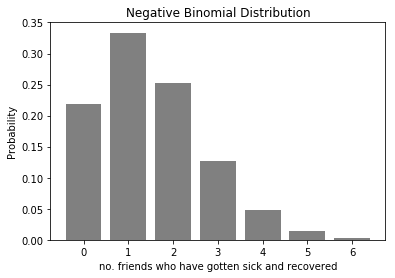

Any person can expect to have this many recovered friends: 1.5


In [7]:
calc_plot_neg_binom_dist(friends_per_person, fraction_recovered, 'recovered friends')

Most people are in the taller columns.  The typical person can expect to know a number of recovered friends shown above, as of today (Aug. 24, 2020).  

Now lets predict the future.  Below is a table of data as of 8/23/2020, from [Johns Hopkins](https://91-divoc.com/pages/covid-visualization): 

In [ ]:
import pandas as pd
days_since_mar_8_20 = [30,50,85,120,157]
num_recovered = [58545,195036,540292,1090645,1985484]
df = pd.DataFrame()
df['days_since_mar_8_20'] = days_since_mar_8_20
df['num_recovered'] = num_recovered
df

Let's plot the data:

In [ ]:
df.plot(x='days_since_mar_8_20', y='num_recovered', kind='scatter', marker='o', color='black')

Let's fit a curve through the dots, so we can predict the future.  

In [ ]:
import pylab
import math

pylab.plot(days_since_mar_8_20, num_recovered, 'ko', label='Actual')

log_num_recovered = []
base = 2.0
for y in num_recovered:
    log_num_recovered.append( math.log(y, base))
fit = pylab.polyfit(days_since_mar_8_20, log_num_recovered, 3)

t_future = days_since_mar_8_20[3] + 70
days_since_mar_8_20.append(t_future)
predicted_num_recovered = []
for x in days_since_mar_8_20:
    predicted_num_recovered.append(base**pylab.polyval(fit, x))

pylab.plot(days_since_mar_8_20, predicted_num_recovered, 'kx', label='Predicted', markeredgewidth=1, markersize = 12)
pylab.title('Predicted No. of Recoveries vs. Time')
pylab.legend(loc='upper left')

The X in the upper right shows the predicted number of recovered Americans we'll have in early November 2020.  It's dramatically higher than today (Aug. 24, 2020).  

NOTE: THIS CURVE FIT IS HIGHLY DUBIOUS.  I merely found a curve that fits the 5 selected data points.  I had no good reason to model the curve as I did, nor did a do a cross-correlation in which I fit random parts of the curve, then check to see if other parts were predicted accurately.  Nevertheless, in the interest of experimenting with Python and Jupyter Notebook, let's continue.  

Let's print the number...

In [ ]:
predicted_num_recovered_nov_2020 = base**pylab.polyval(fit, days_since_mar_8_20[4])
print('prediction = ', predicted_num_recovered_nov_2020 )

The number immediately above is the predicted number of recovered Americans we'll have in early November 2020.

Now let's see how many recovered friends people will have, by repeating the earlier calculations using our prediction.

In [ ]:
fraction_recovered = predicted_num_recovered_nov_2020 / population
print(f'Fraction of Americans who will have recovered from COVID-19 = {100 * fraction_recovered :0.3f}%')
calc_plot_neg_binom_dist(friends_per_person, fraction_recovered, 'recovered friends')

In early November 2020, each of us can expect to know a number of friends, shown above, who have recovered from COVID-19. 

How many of our friends can we expect to die?

In [ ]:
deaths_as_of_nov_2020 = deaths + 70 * deaths_per_day
print(f'Predicted number of American deaths = {deaths_as_of_nov_2020}')
fraction_died = deaths_as_of_nov_2020 / population
print(f'Fraction of Americans who will have died = {100*fraction_died :.2f}%')

In [ ]:
calc_plot_neg_binom_dist(friends_per_person, fraction_died, 'dead friends')

The calculations above show that, between August and November 2020, most Americnas will develop a growing list of friends who have gotten COVID-19 and recovered.  

But most of us will be in the tall column on the left, and so, won't know anyone who has died from COVID-19, even though there will be **about a quarter million dead Americans.**  

These were crude calculations.  I assumed everyone has a fixed number of “friends” and that these friends aren’t grouped into disease-sharing families or groups.  I ignored how some people and their friends live in hotter parts of the country than others.  I didn't rigorously validate my rough exponential curve fit.  I ignored the impact of people having difficult recoveries.  But, just maybe, my analysis reveals broad strokes.  

Knowing multiple people who have recovered, but few, if any, who have died, might create a rosy, but mistaken, perception for most of us.  